In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
#Store the data into the variable df
df = pd.read_csv('bitcoin.csv')
df.head(7)

,Timestamp,market-price
0,2018-04-13 00:00:00,7941.46
1,2018-04-14 00:00:00,7895.25
2,2018-04-15 00:00:00,8013.91
3,2018-04-16 00:00:00,8368.10
4,2018-04-17 00:00:00,8069.03
5,2018-04-18 00:00:00,7907.19
6,2018-04-19 00:00:00,8175.96


In [3]:
#Remove the Date column
df.drop(['Timestamp'], 1, inplace=True)

In [4]:
#Show the first 7 rows of the new data set
df.head(7)

,market-price
0,7941.46
1,7895.25
2,8013.91
3,8368.10
4,8069.03
5,7907.19
6,8175.96


In [5]:
#A variable for predicting 'n' days out into the future
prediction_days = 60 #n = 30 days

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['market-price']].shift(-prediction_days)

In [6]:
df.head(10)

,market-price,Prediction
0,7941.46,6879.31
1,7895.25,6553.00
2,8013.91,6299.89
3,8368.10,6637.41
4,8069.03,6391.16
5,7907.19,6488.68
6,8175.96,6445.79
7,8288.12,6712.50
8,8876.51,6743.41
9,8930.60,6760.83


In [7]:
df.tail(7)

,market-price,Prediction
1089,59054.10,NaN
1090,58020.46,NaN
1091,55947.27,NaN
1092,58048.59,NaN
1093,58102.58,NaN
1094,59774.00,NaN
1095,59964.87,NaN


In [8]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]
print(X)

[[ 7941.46]
 [ 7895.25]
 [ 8013.91]
 ...
 [46364.3 ]
 [46589.58]
 [44878.17]]


In [9]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
y=np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows 
y = y[:-prediction_days] 
print(y)

[ 6879.31  6553.    6299.89 ... 58102.58 59774.   59964.87]


In [10]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)


[[48013.38]
 [47471.4 ]
 [47185.19]
 [48720.37]
 [47951.85]
 [49160.1 ]
 [52118.23]
 [51608.15]
 [55916.5 ]
 [56001.2 ]
 [57487.86]
 [54123.4 ]
 [48880.43]
 [50624.84]
 [46800.42]
 [46340.31]
 [46155.87]
 [45113.92]
 [49618.43]
 [48356.04]
 [50477.7 ]
 [48448.91]
 [48861.38]
 [48881.59]
 [51169.7 ]
 [52299.33]
 [54881.52]
 [55997.23]
 [57764.  ]
 [57253.28]
 [61258.73]
 [59133.47]
 [55754.72]
 [56872.38]
 [58913.  ]
 [57665.9 ]
 [58075.1 ]
 [58085.8 ]
 [57411.17]
 [54204.96]
 [54477.46]
 [52508.23]
 [51415.92]
 [55074.47]
 [55863.93]
 [55783.71]
 [57627.67]
 [58730.13]
 [58735.25]
 [58736.92]
 [59031.32]
 [57076.49]
 [58206.55]
 [59054.1 ]
 [58020.46]
 [55947.27]
 [58048.59]
 [58102.58]
 [59774.  ]
 [59964.87]]


In [12]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=1000.0, gamma=1e-05)

In [13]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.3470152920525492


In [14]:
# Print the predicted value
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

#Print the actual values
print(y_test)


[ 5658.39464961 11750.95052105  5576.9004007   8505.51885716
  7513.04265959  9584.79558556  9573.77976211  8451.28448977
  8650.10425896  6687.52097523  9633.12285967 14533.93890348
  6791.64631621  5674.46253353  7482.5182264  16286.17634075
  8414.88625407  6920.05183937  7601.2240539   9018.3121059
 12595.59190714  7869.55568604  8648.6957762  10076.0359911
  8778.69386899  8484.50521754  7339.89984264  4042.63312568
  8409.46027039 11289.68768945 13273.8318089   4698.55490908
  8408.10351087  7370.31267984  7233.13404044  4390.88545261
  6575.34271226  9872.44006473  8127.73288221  8600.03763768
  4107.21653268 19075.94968194 10925.51384292 11336.86418291
 15362.15688701  8150.71484961  6793.8685882  17777.5885581
  5683.6918012  16285.48727555  9442.80337364  9876.00641773
 17307.75035552  8629.24906186  9776.7746678   4416.38711544
  8114.60080779  9453.06895921 17319.9004684   8064.6847143
  7253.1674653   8435.25551208  8336.74695552 10548.37826463
 19847.25926136  8353.142578

In [15]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

print()

print(df.tail(prediction_days))

[14582.42207405 14582.84173272 14611.21824726 14582.42207248
 14582.4220812  14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 15223.54436519 15119.63791276
 14734.85309331 15156.04637374 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248
 14582.42207248 14582.42207248 14582.42207248 14582.42207248]

      market-price  Prediction
1036      48013.38         NaN
1037      47471.40   

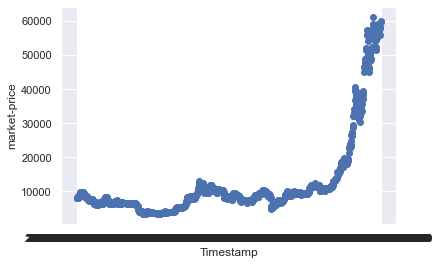

In [17]:
dff = pd.read_csv('bitcoin.csv')
plt.scatter(dff['Timestamp'],df['market-price'])
plt.xlabel('Timestamp')
plt.ylabel('market-price')
plt.show()